<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Строим-модель-без-учета-баланса:" data-toc-modified-id="Строим-модель-без-учета-баланса:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Строим модель без учета баланса:</a></span><ul class="toc-item"><li><span><a href="#Обучение-с-помощью-модели-решающее-дерево" data-toc-modified-id="Обучение-с-помощью-модели-решающее-дерево-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Обучение с помощью модели решающее дерево</a></span></li><li><span><a href="#Обучение-с-помощью-модели-Случайный-лес" data-toc-modified-id="Обучение-с-помощью-модели-Случайный-лес-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Обучение с помощью модели Случайный лес</a></span></li><li><span><a href="#Обучение-с-помощью-модели-логистическая-регрессия" data-toc-modified-id="Обучение-с-помощью-модели-логистическая-регрессия-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Обучение с помощью модели логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Проведем-обучение-на-примере-модели-Решающее-дерево-с-учетом-дисбаланса:" data-toc-modified-id="Проведем-обучение-на-примере-модели-Решающее-дерево-с-учетом-дисбаланса:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проведем обучение на примере модели Решающее дерево с учетом дисбаланса:</a></span></li><li><span><a href="#Проведем-обучение-на-примере-модели-Случайный-лес-с-учетом-дисбаланса:" data-toc-modified-id="Проведем-обучение-на-примере-модели-Случайный-лес-с-учетом-дисбаланса:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проведем обучение на примере модели Случайный лес с учетом дисбаланса:</a></span></li><li><span><a href="#Проведем-обучение-на-примере-модели-Линейная-регрессия-с-учетом-дисбаланса:" data-toc-modified-id="Проведем-обучение-на-примере-модели-Линейная-регрессия-с-учетом-дисбаланса:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проведем обучение на примере модели Линейная регрессия с учетом дисбаланса:</a></span></li><li><span><a href="#Исследование-метрики-AUC-ROC" data-toc-modified-id="Исследование-метрики-AUC-ROC-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Исследование метрики AUC-ROC</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

Загрузим данные: 

In [2]:
data = pd.read_csv("Churn.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Целевой признак Exited - категориальный признак (принимает значения клиент 0 - остается, 1 - уходит)

Заменим пропуски в столбце Tenure на медианное значение по этому столбцу:

In [4]:
data['Tenure'] = data['Tenure'].fillna(data['Tenure'].median())

In [5]:
data.isna().sum() # проверим есть ли пропуски

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.columns = data.columns.str.lower() # приведем названия столбцов к нижнему регистру

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           10000 non-null  float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
data = data.drop(columns = ['rownumber', 'customerid', 'surname']) # удалим столбцы, так как не имеют значение

In [9]:
data

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Для кодирования данных применим метод прямого кодирования (OHE), т.к. он применяется - для номинальных категорий.

In [11]:
data_ohe = pd.get_dummies(data, drop_first=True)

In [12]:
data_ohe

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


разобъем данные на выборки (обучающая, валидационная, тестовая): 

In [13]:
# разбили данные на 2 выборки: 1- это обучающая и валидационная data_train_valid, 2- это тестовая 20% data_test
data_train_valid, data_test = train_test_split(data_ohe, test_size=0.2, random_state=12345) 

# разобьем обучающую (60%) и валидационную (20%): 
data_train, data_valid = train_test_split(data_train_valid, test_size=0.25, random_state=12345)

In [14]:
print('Выборка для обучения модели', data_train.shape)
print('Выборка для поверки модели на переобучение', data_valid.shape)
print('Выборка для оценки качества модели', data_test.shape)

Выборка для обучения модели (6000, 12)
Выборка для поверки модели на переобучение (2000, 12)
Выборка для оценки качества модели (2000, 12)


In [15]:
# создадим переменные, в целевую переменную запишем столбец Exited, а все остальные - в признаки
# для обучающей выборки:
features_train = data_train.drop(['exited'], axis=1)
target_train = data_train['exited']

# для валидационной выборки:
features_valid = data_valid.drop(['exited'], axis=1) 
target_valid = data_valid['exited']

In [16]:
# создадим переменные для тестовой выборки
test_target = data_test['exited']
test_features = data_test.drop(['exited'], axis=1)

Признаки имеют данные разного масштаба. Проведем масштабированое путем стандартизации данных:

Осуществим масштабирование признаков:

In [17]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   creditscore        10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   tenure             10000 non-null  float64
 3   balance            10000 non-null  float64
 4   numofproducts      10000 non-null  int64  
 5   hascrcard          10000 non-null  int64  
 6   isactivemember     10000 non-null  int64  
 7   estimatedsalary    10000 non-null  float64
 8   exited             10000 non-null  int64  
 9   geography_Germany  10000 non-null  uint8  
 10  geography_Spain    10000 non-null  uint8  
 11  gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


In [18]:
data_ohe.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
numeric = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'isactivemember', 'estimatedsalary', 'geography_Germany', 'geography_Spain', 'gender_Male']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
test_features[numeric] = scaler.transform(test_features[numeric])
pd.options.mode.chained_assignment = None # чтобы убрать предупреждение

## Исследование задачи

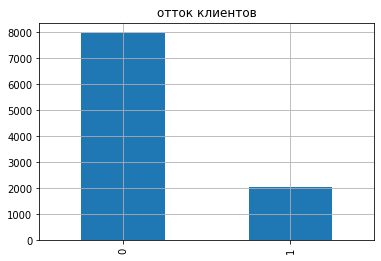

In [17]:
data_ohe['exited'].value_counts().plot(kind='bar',grid=True,title='отток клиентов')
plt.show()

Видно, что отток клиентов описывается соотношением 1:4 (остались-ушли). Присутствует дисбаланс классов. 

### Строим модель без учета баланса: 

#### Обучение с помощью модели решающее дерево

Определим F1-меру, как одну из мер, которая оценивает качество прогноза положительного класса с разных позиций (полнота и точность) на модели решающее дерево, выберем лучшее значение f1 для максимальной глубины:

In [18]:
best_result_tree = 0
best_depth_tree = 0
for depth in range(1,20):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree.fit(features_train, target_train)
    predicted_tree_valid = model_tree.predict(features_valid)
    result_tree = f1_score(target_valid, predicted_tree_valid)
    if result_tree > best_result_tree:
            best_result_tree = result_tree
            best_depth_tree = depth
print('F1 лучшей модели решающее дерево:', best_result_tree,
      'максимальная глубина:', best_depth_tree)

F1 лучшей модели решающее дерево: 0.5583596214511041 максимальная глубина: 7


#### Обучение с помощью модели Случайный лес

Определим f1 для модели случайный лес. Найдем лучшее значение f1, подобрав количество деревьев и глубину: 

In [19]:
best_result_forest = 0
best_est_forest = 0
best_depth_forest = 0
for est in range(1, 100, 10):
    for depth in range(1, 100, 10):
        model_forest = RandomForestClassifier(random_state=1245, n_estimators=est, max_depth=depth)
        model_forest.fit(features_train, target_train)
        predicted_forest_valid = model_forest.predict(features_valid)
        result_forest = f1_score(target_valid, predicted_forest_valid)
        if result_forest > best_result_forest:
            best_result_forest = result_forest
            best_est_forest = est
            best_depth_forest = depth
print('F1 лучшей модели случайный лес:', best_result_forest,
     'количество деревьев:', best_est_forest,
     'максимальная глубина:', best_depth_forest)

F1 лучшей модели случайный лес: 0.573228346456693 количество деревьев: 71 максимальная глубина: 21


#### Обучение с помощью модели логистическая регрессия

In [20]:
model_logistic=LogisticRegression()
model_logistic.fit(features_train,target_train)
prediction_logistic_valid=model_logistic.predict(features_valid)
result_logistic=f1_score(target_valid, prediction_logistic_valid)
print('F1 модели логистическая регрессия:', result_logistic)

F1 модели логистическая регрессия: 0.30131826741996237


Вывод: при рассмотрении данных с дисбалансом, самой лучшей моделью оказалась модель Случайный лес: мера f1 (среднее гармоническое полноты и точности) равна 0.5168539325842697 количество деревьев: 51 максимальная глубина: 81. 

## Борьба с дисбалансом

- Используем взвешивание классов на методе логистическая регрессия: 

In [21]:
model_logistic_disb = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_logistic_disb.fit(features_train, target_train)
predicted_disb_valid = model_logistic_disb.predict(features_valid)
result_disb_logistic = f1_score(target_valid, predicted_disb_valid)
print("F1 модели логистическая регрессия с использованием взвешивания классов:", result_disb_logistic)

F1 модели логистическая регрессия с использованием взвешивания классов: 0.47500000000000003


- Используем метод увеличения выборки (upsampling)

Объектов отрицательного класса больше. Продублируем объекты положительного класса и объединим их с объектами отрицательного класса.

In [22]:
def upsample(features, target, repeat): 
    features_zeros = features_train[target_train == 0] #  разделим обучающую выборку на отрицательные и положительные объекты
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345) 
    return features_upsampled, target_upsampled 

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

In [23]:
print(features_upsampled.shape) # напечатаем размеры реобразованных выборок
print(target_upsampled.shape)

(16971, 11)
(16971,)


- Используем метод уменьшения выборки (downsampling)

In [24]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)

В борьбе с дисбалансом рассмотрим методы взвешивания классов, увеличения выборки (upsampling), уменьшения выборки (downsampling). 

Проведем изучение на моделях после балансирования:

### Проведем обучение на примере модели Решающее дерево с учетом дисбаланса:

 - - применим увеличение выборки

In [25]:
best_result_1 = 0
best_depth_1 = 0
for depth in range(1,20):
    model_tree_disb_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree_disb_1.fit(features_upsampled, target_upsampled)
    predicted_disb_1_tree_valid = model_tree_disb_1.predict(features_valid)
    result_tree_disb_1 = f1_score(target_valid, predicted_disb_1_tree_valid)
    if result_tree_disb_1 > best_result_1:
            best_result_1 = result_tree_disb_1
            best_depth_1 = depth
print('F1 лучшей модели решающее дерево с учетом дисбаланса:', best_result_1,
      'максимальная глубина:', best_depth_1)

F1 лучшей модели решающее дерево с учетом дисбаланса: 0.4869186046511628 максимальная глубина: 5


- - применим уменьшение выборки

In [26]:
best_result_2 = 0
best_depth_2 = 0
for depth in range(1,50):
    model_tree_disb_2 = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_tree_disb_2.fit(features_downsampled, target_downsampled)
    predicted_disb_2_tree_valid = model_tree_disb_2.predict(features_valid)
    result_tree_disb_2 = f1_score(target_valid, predicted_disb_2_tree_valid)
    if result_tree_disb_2 > best_result_2:
            best_result_2 = result_tree_disb_2
            best_depth_2 = depth
print('F1 лучшей модели решающее дерево с учетом дисбаланса:', best_result_2,
      'максимальная глубина:', best_depth_2)

F1 лучшей модели решающее дерево с учетом дисбаланса: 0.5156626506024097 максимальная глубина: 5


### Проведем обучение на примере модели Случайный лес с учетом дисбаланса:

- - применим увеличение выборки

In [27]:
model_forest_disb_1 = RandomForestClassifier(random_state=1245, n_estimators=91, max_depth=21)
model_forest_disb_1.fit(features_upsampled, target_upsampled)
predicted_forest_valid_1 = model_forest_disb_1.predict(features_valid)
result_forest_disb_1 = f1_score(target_valid, predicted_forest_valid_1)
print('F1 лучшей модели случайный лес с учетом дисбаланса:', result_forest_disb_1)

F1 лучшей модели случайный лес с учетом дисбаланса: 0.5856353591160222


- - применим уменьшение выборки

In [28]:
model_forest_disb_2 = RandomForestClassifier(random_state=1245, n_estimators=51, max_depth=81)
model_forest_disb_2.fit(features_downsampled, target_downsampled)
predicted_forest_valid_2 = model_forest_disb_2.predict(features_valid)
result_forest_disb_2 = f1_score(target_valid, predicted_forest_valid_2)
print('F1 лучшей модели случайный лес с учетом дисбаланса:', result_forest_disb_2)

F1 лучшей модели случайный лес с учетом дисбаланса: 0.4716855429713524


### Проведем обучение на примере модели Линейная регрессия с учетом дисбаланса:

- - увеличение выборки:

In [29]:
model_logistic_disb_2 = LogisticRegression(solver = 'liblinear', random_state=12345)
model_logistic_disb_2.fit(features_upsampled, target_upsampled)
predicted_disb2_valid = model_logistic_disb_2.predict(features_valid)
result_disb2_logistic = f1_score(target_valid, predicted_disb2_valid)
print("F1 модели логистическая регрессия с использованием увеличения выборки:", result_disb2_logistic)

F1 модели логистическая регрессия с использованием увеличения выборки: 0.4052863436123348


- - уменьшение выборки

In [30]:
model_logistic_disb_3 = LogisticRegression(solver = 'liblinear', random_state=12345)
model_logistic_disb_2.fit(features_downsampled, target_downsampled)
predicted_disb3_valid = model_logistic_disb_2.predict(features_valid)
result_disb3_logistic = f1_score(target_valid, predicted_disb3_valid)
print("F1 модели логистическая регрессия с использованием уменьшения выборки::", result_disb3_logistic)

F1 модели логистическая регрессия с использованием уменьшения выборки:: 0.4064768285873814


### Исследование метрики AUC-ROC

- Исследуем для модели Логистическая регрессия: 

In [31]:
probabilities_valid_model_logistic = model_logistic.predict_proba(features_valid)
probabilities_one_valid_model_logistic = probabilities_valid_model_logistic[:, 1]

auc_roc_model_logistic = roc_auc_score(target_valid, probabilities_one_valid_model_logistic)
print('для логистической регрессии AUC-ROC равно', auc_roc_model_logistic)

для логистической регрессии AUC-ROC равно 0.7703025977597242


In [32]:
fpr_log, tpr_log, thresholds_log = roc_curve(target_valid, probabilities_one_valid_model_logistic)

- Исследуем для модели Решающее дерево:

In [33]:
probabilities__valid_model_tree=model_tree.predict_proba(features_valid)
probabilities_one_valid_tree=probabilities__valid_model_tree[:,1]

auc_roc_model_tree = roc_auc_score(target_valid, probabilities_one_valid_tree)
print('для решающего девева AUC-ROC равно', auc_roc_model_tree)

для решающего девева AUC-ROC равно 0.6900665851770492


In [34]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(target_valid, probabilities_one_valid_tree)

- Исследуем для модели Случайный лес:

In [35]:
probabilities__valid_model_forest=model_forest.predict_proba(features_valid)
probabilities_one_valid_forest=probabilities__valid_model_forest[:,1]

auc_roc_model_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)
print('для случайного леса AUC-ROC равно', auc_roc_model_forest)

для случайного леса AUC-ROC равно 0.840153452685422


In [36]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(target_valid, probabilities_one_valid_forest)

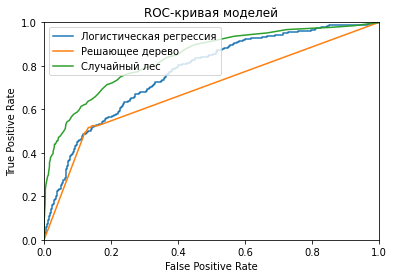

In [37]:
plt.figure()
plt.plot(fpr_log, tpr_log)
plt.plot(fpr_tree, tpr_tree)
plt.plot(fpr_forest, tpr_forest)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая моделей')
plt.legend(('Логистическая регрессия','Решающее дерево', 'Случайный лес'),
           loc= 'upper left') 
plt.show() 

### Вывод: 
Значение площади под кривой. На сколько наша модель отличается от случайной. 

Лучшее значение метрики auc roc = 0.8065897183396057 у модели Случайный лес

In [38]:
table = {'Решающее дерево':np.array([best_result_tree, best_result_2, auc_roc_model_tree]),
         'Случайный лес':np.array([best_result_forest, result_forest_disb_1, auc_roc_model_forest]),
         'Логистическая регрессия':np.array([result_logistic, result_disb2_logistic, auc_roc_model_logistic])}
rezult_df=pd.DataFrame(table,index=['f1 без дисбаланса','f1 с учетом дисбаланса', 'AUC-ROC'])

In [39]:
rezult_df

,Решающее дерево,Случайный лес,Логистическая регрессия
f1 без дисбаланса,0.558360,0.573228,0.301318
f1 с учетом дисбаланса,0.515663,0.585635,0.405286
AUC-ROC,0.690067,0.840153,0.770303


## Тестирование модели

In [40]:
# Решающее дерево:
predicted_test_tree1 = model_tree_disb_1.predict(test_features)
result_test_tree1 = f1_score(test_target, predicted_test_tree1)
print("F1 модели решающее дерево с использованием увеличения выборки:", result_test_tree1)

F1 модели решающее дерево с использованием увеличения выборки: 0.4908675799086758


In [41]:
# Случайный лес: 
predicted_test = model_forest_disb_1.predict(test_features)
result_test = f1_score(test_target, predicted_test)
print("F1 модели случайный лес с использованием увеличения выборки:", result_test)

F1 модели случайный лес с использованием увеличения выборки: 0.5930680359435174


In [42]:
predicted_test2 = model_forest_disb_2.predict(test_features)
result_test2 = f1_score(test_target, predicted_test2)
print("F1 модели случайный лес с использованием увеличения выборки:", result_test2)

F1 модели случайный лес с использованием увеличения выборки: 0.49209361163820364


Определим метрику AUC-ROC для тестовой выборки на модели Случайный лес

In [43]:
probabilities__test_model_forest=model_forest_disb_1.predict_proba(test_features)
probabilities_one_test_forest=probabilities__test_model_forest[:,1]

auc_roc_model_forest_test = roc_auc_score(test_target, probabilities_one_test_forest)
print('для случайного леса AUC-ROC равно', auc_roc_model_forest_test)

для случайного леса AUC-ROC равно 0.8528714206806606


# Общий вывод: 

- Рассмотрев три модели: Решающее дерево, Случайный лес и Логистическая регрессия с учетом отсутствия баланса классов и с балансом. Можно сделать вывод о том, что наилучший вариант меры f1 на тестовой выборке данных показала модель Случайный лес с балансом классов при применении увеличения выборки, а также с гиперпараметрами: количество деревьев: 91 максимальная глубина: 21. Мера f1 равна 0.5930680359435174

- метрика AUC-ROC для тестовой выборки на модели Случайный лес равна 0.8528714206806606. 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*